# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # seaborn and mtick are used for the function format_ticks 

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [2]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
# properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)


properties = pd.read_excel(
    "UK House price index.xlsx",
    sheet_name="Average price",
    index_col=None
)
print(properties.head())


  Unnamed: 0 City of London Barking & Dagenham     Barnet     Bexley  \
0        NaT      E09000001          E09000002  E09000003  E09000004   
1 1995-01-01          90347              51870      98948      64956   
2 1995-02-01          81213              52513      98848      64786   
3 1995-03-01          78168              52701      97848      64366   
4 1995-04-01          76172              54618      96273      64276   

       Brent    Bromley     Camden    Croydon     Ealing  ... NORTH WEST  \
0  E09000005  E09000006  E09000007  E09000008  E09000009  ...  E12000002   
1      76880      83082     119775      70118      85469  ...      40907   
2      77651      83068     118365      69908      86551  ...      40877   
3      77644      82856     119131      69666      87067  ...      41351   
4      78668      82525     118948      69562      87933  ...      41195   

  YORKS & THE HUMBER EAST MIDLANDS WEST MIDLANDS EAST OF ENGLAND     LONDON  \
0          E12000003     E12000

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [3]:
properties.shape

(363, 49)

In [4]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,90347,51870,98948,64956,76880,83082,119775,70118,85469,...,40907,42171,43856,46470,56098,79687,64502,52799,NaN,50231
2,1995-02-01,81213,52513,98848,64786,77651,83068,118365,69908,86551,...,40877,41912,44344,47249,55991,77913,64196,52462,NaN,50130
3,1995-03-01,78168,52701,97848,64366,77644,82856,119131,69666,87067,...,41351,42544,43701,47345,55574,79110,64597,51716,NaN,50229
4,1995-04-01,76172,54618,96273,64276,78668,82525,118948,69562,87933,...,41195,42934,44414,47359,55966,79708,65111,52877,NaN,50597


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [5]:
properties_T = properties.T
properties_T.index

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [6]:
properties_T = properties_T.reset_index()
properties_T.head()

,index,0,1,2,3,4,5,6,7,8,...,353,354,355,356,357,358,359,360,361,362
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00
1,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,905952,837917,777892,778284,787421,759401,725572,807642,807469,787104
2,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,341750,335531,336359,328071,334740,342867,354748,354327,353227,363323
3,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,616958,619994,624981,628093,624601,626302,627685,622984,610940,602832
4,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,395593,399795,398682,404250,405628,408270,405656,404102,405583,408294


**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [7]:
properties_T.columns = properties_T.iloc[0]
properties_T.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00
1,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,905952,837917,777892,778284,787421,759401,725572,807642,807469,787104
2,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,341750,335531,336359,328071,334740,342867,354748,354327,353227,363323
3,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,616958,619994,624981,628093,624601,626302,627685,622984,610940,602832
4,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,395593,399795,398682,404250,405628,408270,405656,404102,405583,408294


In [8]:
properties_T = properties_T.drop(0)

In [9]:
properties_T = properties_T.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'})
properties_T.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00
1,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,905952,837917,777892,778284,787421,759401,725572,807642,807469,787104
2,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,341750,335531,336359,328071,334740,342867,354748,354327,353227,363323
3,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,616958,619994,624981,628093,624601,626302,627685,622984,610940,602832
4,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,395593,399795,398682,404250,405628,408270,405656,404102,405583,408294
5,Brent,E09000005,76880,77651,77644,78668,79464,80118,79920,79295,...,540597,564733,564958,576330,582362,593866,595358,576148,572675,555173


**2.4.Transforming the data**


You might need to **melt** your DataFrame here. 

In [10]:
clean_properties = pd.melt(properties_T,id_vars=['London_Borough','ID'])
clean_properties.head()

,London_Borough,ID,0,value
0,City of London,E09000001,1995-01-01,90347
1,Barking & Dagenham,E09000002,1995-01-01,51870
2,Barnet,E09000003,1995-01-01,98948
3,Bexley,E09000004,1995-01-01,64956
4,Brent,E09000005,1995-01-01,76880


In [11]:
clean_properties = clean_properties.rename(columns = {0: 'Month', 'value': 'Average_price'})
clean_properties.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price             object
dtype: object

In [12]:
###### Call the to_numeric() method on pd, pass the 'Average_price' column into its brackets, and reassign the result to the clean_properties 'Average_price' column.

In [13]:
clean_properties["Average_price"] = pd.to_numeric(clean_properties["Average_price"])
clean_properties.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price            float64
dtype: object

In [14]:
clean_properties.count()

London_Borough    17376
ID                16290
Month             17376
Average_price     16290
dtype: int64

In [15]:
clean_properties['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [16]:
clean_properties[clean_properties['London_Borough'] == 'Unnamed: 37'].head()

,London_Borough,ID,Month,Average_price
36,Unnamed: 37,NaN,1995-01-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
132,Unnamed: 37,NaN,1995-03-01,NaN
180,Unnamed: 37,NaN,1995-04-01,NaN
228,Unnamed: 37,NaN,1995-05-01,NaN


In [17]:
# filtering the data with NaN values
NaNFreeDF2 = clean_properties.dropna()
NaNFreeDF2.head(48)

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,90347.0
1,Barking & Dagenham,E09000002,1995-01-01,51870.0
2,Barnet,E09000003,1995-01-01,98948.0
3,Bexley,E09000004,1995-01-01,64956.0
4,Brent,E09000005,1995-01-01,76880.0
5,Bromley,E09000006,1995-01-01,83082.0
6,Camden,E09000007,1995-01-01,119775.0
7,Croydon,E09000008,1995-01-01,70118.0
8,Ealing,E09000009,1995-01-01,85469.0
9,Enfield,E09000010,1995-01-01,77018.0


In [18]:
# Let's do a count on this DataFrame object: 
NaNFreeDF2.count()

London_Borough    16290
ID                16290
Month             16290
Average_price     16290
dtype: int64

In [19]:
NaNFreeDF2['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

In [20]:
print(NaNFreeDF2.shape)

(16290, 4)


In [21]:
## Drop the rest of the invalid 'London Borough' values.

In [22]:
# A list of non-boroughs. 
nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']

In [23]:
NaNFreeDF2[NaNFreeDF2.London_Borough.isin(nonBoroughs)]

,London_Borough,ID,Month,Average_price
34,Inner London,E13000001,1995-01-01,85892.0
35,Outer London,E13000002,1995-01-01,76196.0
37,NORTH EAST,E12000001,1995-01-01,39809.0
38,NORTH WEST,E12000002,1995-01-01,40907.0
39,YORKS & THE HUMBER,E12000003,1995-01-01,42171.0
...,...,...,...,...
17370,EAST OF ENGLAND,E12000006,2025-02-01,338468.0
17371,LONDON,E12000007,2025-02-01,555625.0
17372,SOUTH EAST,E12000008,2025-02-01,384659.0
17373,SOUTH WEST,E12000009,2025-02-01,308207.0


In [24]:
NaNFreeDF2 = NaNFreeDF2[~NaNFreeDF2.London_Borough.isin(nonBoroughs)]

In [25]:
NaNFreeDF2.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,90347.0
1,Barking & Dagenham,E09000002,1995-01-01,51870.0
2,Barnet,E09000003,1995-01-01,98948.0
3,Bexley,E09000004,1995-01-01,64956.0
4,Brent,E09000005,1995-01-01,76880.0


In [26]:
df= NaNFreeDF2

In [27]:
df.head()
df.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price            float64
dtype: object

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

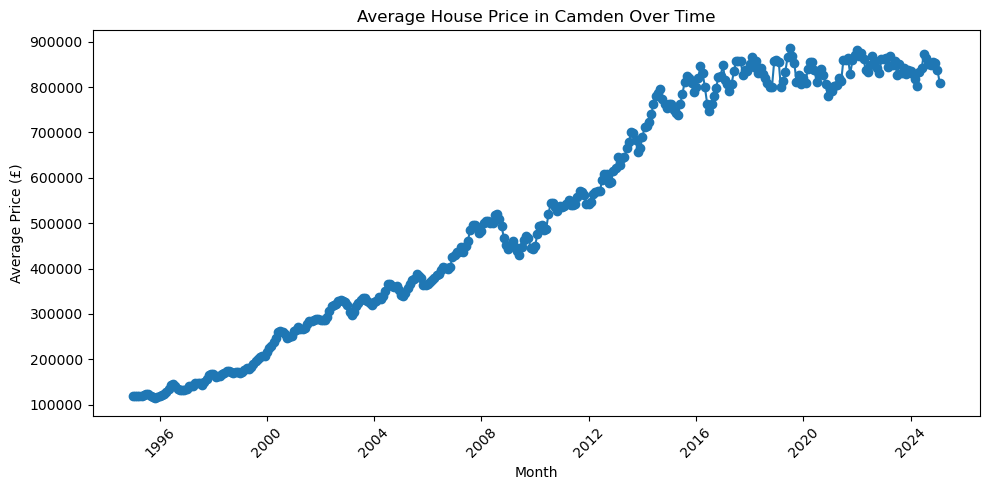

In [28]:
# Subset for a particular borough (e.g., Camden)
borough_name = "Camden"
camden_prices = df[df['London_Borough'] == 'Camden']
plt.figure(figsize=(10, 5))
plt.plot(camden_prices["Month"], camden_prices["Average_price"], marker="o", linestyle="-")
plt.title(f"Average House Price in {borough_name} Over Time")
plt.xlabel("Month")
plt.ylabel("Average Price (£)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

__Justification__ <br>
__A line plot for Camden visualizes its trend over time, making seasonal / recurring patterns evident.__

 __Boxplot of Price Distribution by Borough__

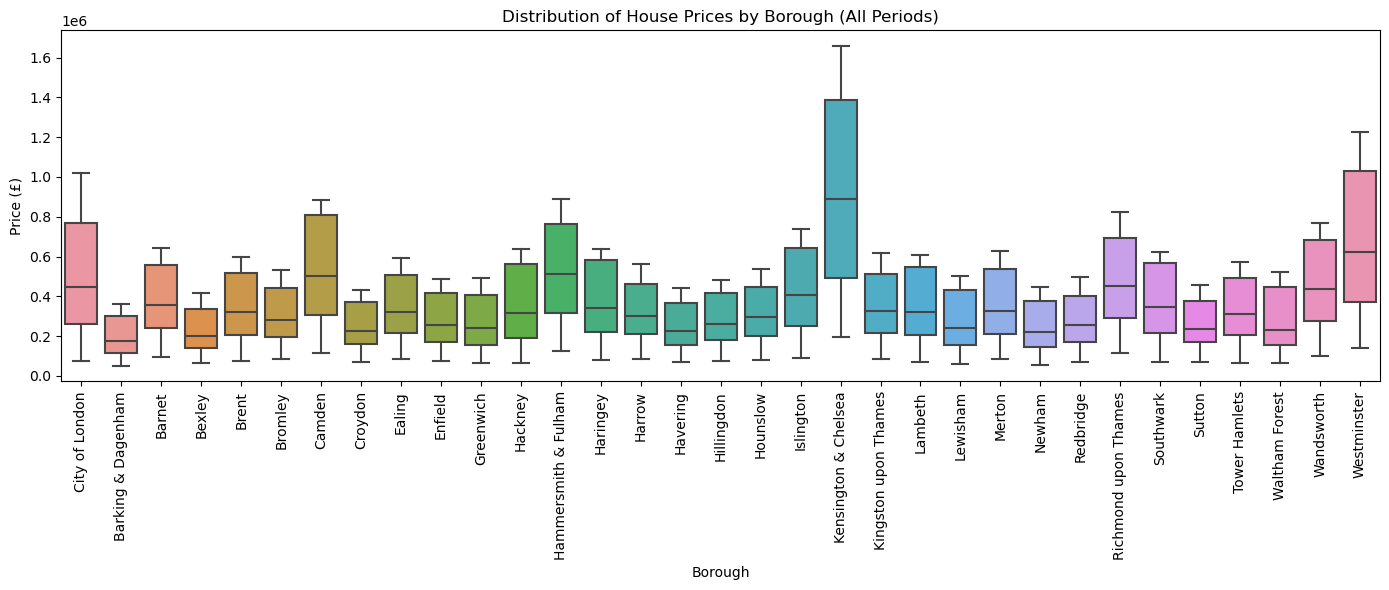

In [29]:
# Boxplot for all boroughs
plt.figure(figsize=(14, 6))
sns.boxplot(x="London_Borough", y="Average_price", data=NaNFreeDF2)
plt.xticks(rotation=90)
plt.title("Distribution of House Prices by Borough (All Periods)")
plt.xlabel("Borough")
plt.ylabel("Price (£)")
plt.tight_layout()
plt.show()

__Justification:<br>
A boxplot across each borough (all time periods) shows median, IQR, and outliers, revealing which boroughs have greater variability__

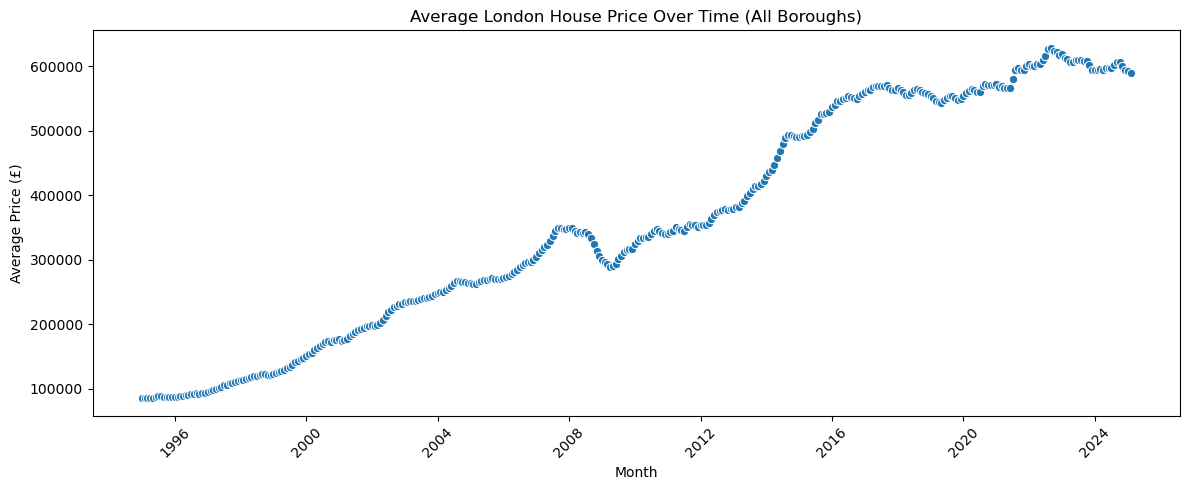

In [51]:
# Pan-London house price average for each Month
df_avg_time = NaNFreeDF2.groupby("Month")["Average_price"].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(df_avg_time["Month"], df_avg_time["Average_price"], marker="o", linewidth=1)
plt.title("Average London House Price Over Time (All Boroughs)")
plt.xlabel("Month")
plt.ylabel("Average Price (£)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

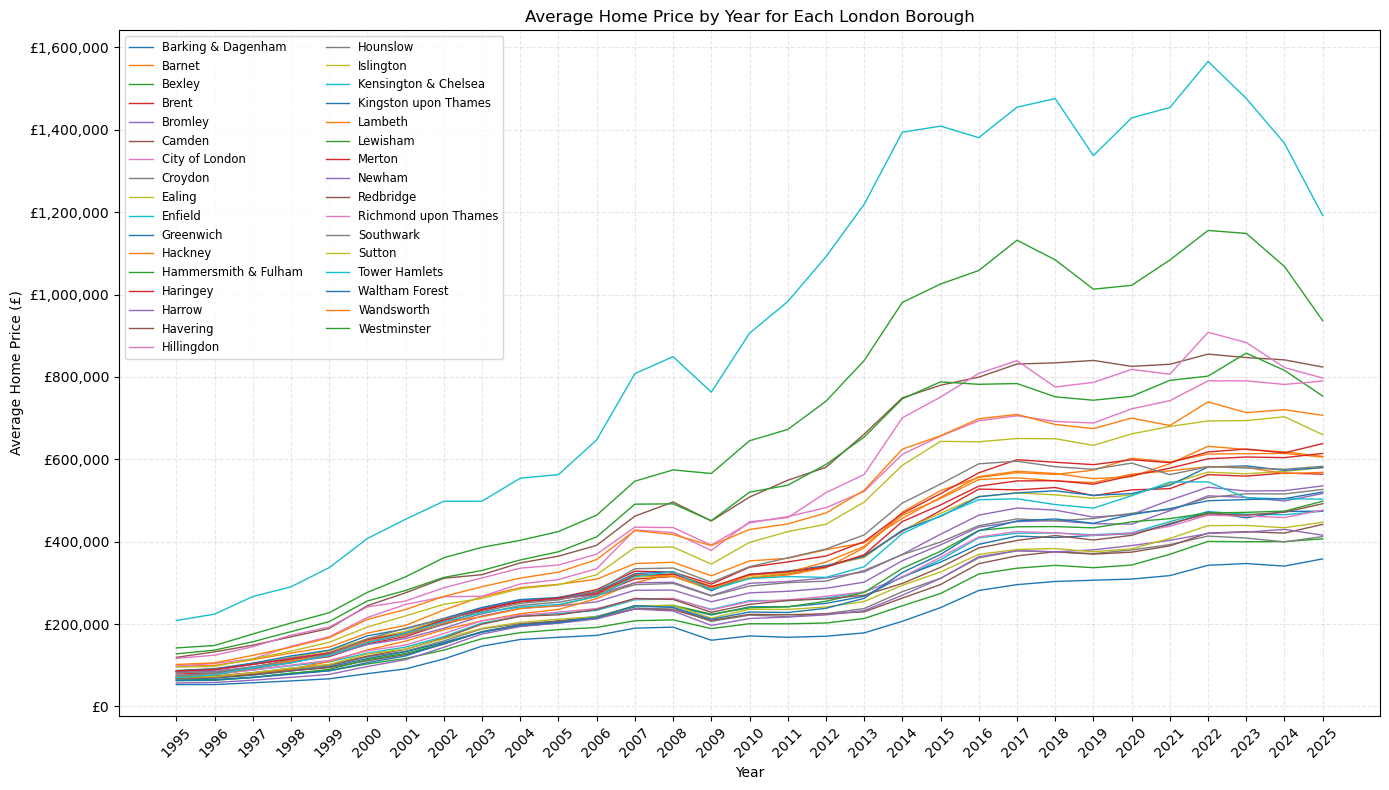

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# 1. Extract Year from Month
NaNFreeDF2["Year"] = NaNFreeDF2["Month"].apply(lambda dt: dt.year)

# 2. Compute yearly average price per borough
df_yearly = (
    NaNFreeDF2
    .groupby(["London_Borough", "Year"])["Average_price"]
    .mean()
    .reset_index()
)

# 3. Pivot so each borough is its own column, indexed by Year (integers)
pivot_yearly = df_yearly.pivot(
    index="Year",
    columns="London_Borough",
    values="Average_price"
)

# 4. Plot one line per borough
plt.figure(figsize=(14, 8))
for borough in pivot_yearly.columns:
    plt.plot(
        pivot_yearly.index,
        pivot_yearly[borough],
        label=borough,
        linewidth=1
    )

plt.xlabel("Year")
plt.ylabel("Average Home Price (£)")
plt.title("Average Home Price by Year for Each London Borough")

# 5. Since index is integer years, set xticks manually
years = pivot_yearly.index.tolist()
plt.xticks(years, rotation=45)

# 5b. Format the y-axis to show “£250,000” style
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter("£{x:,.0f}"))

# 6. Final touches
plt.legend(loc="upper left", fontsize="small", ncol=2)
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()


In [32]:
def create_price_ratio(d):
    y1998 = float(d['Average_price'][d['Year']==1998])
    y2018 = float(d['Average_price'][d['Year']==2018])
    ratio = [y2018/y1998]
    return ratio

**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [36]:
df['Year'] = df['Month'].apply(lambda t: t.year)

# Call the tail() method on df
df.tail()

,London_Borough,ID,Month,Average_price,Year
17356,Sutton,E09000029,2025-02-01,445207.0,2025
17357,Tower Hamlets,E09000030,2025-02-01,502561.0,2025
17358,Waltham Forest,E09000031,2025-02-01,523121.0,2025
17359,Wandsworth,E09000032,2025-02-01,710541.0,2025
17360,Westminster,E09000033,2025-02-01,920645.0,2025


In [37]:
dfg = df.groupby(by=['London_Borough', 'Year']).mean()
dfg.sample(10)

,,Average_price
London_Borough,Year,
Kensington & Chelsea,2003,4.982488e+05
Brent,2019,5.116900e+05
Kensington & Chelsea,2025,1.191643e+06
Merton,2023,6.055624e+05
Havering,2012,2.247955e+05
Southwark,2006,2.802019e+05
Wandsworth,2003,2.906678e+05
Hounslow,2008,2.986546e+05
Hackney,2012,3.365308e+05


In [38]:
dfg = dfg.reset_index()
dfg.head()

,London_Borough,Year,Average_price
0,Barking & Dagenham,1995,53265.416667
1,Barking & Dagenham,1996,53162.666667
2,Barking & Dagenham,1997,57537.583333
3,Barking & Dagenham,1998,61969.666667
4,Barking & Dagenham,1999,67145.333333


In [39]:
def create_price_ratio(d):
    y1998 = float(d['Average_price'][d['Year']==1998])
    y2018 = float(d['Average_price'][d['Year']==2018])
    ratio = [y2018/y1998]
    return ratio

In [40]:
#  Test out the function by calling it with the following argument:
# dfg[dfg['London_Borough']=='Barking & Dagenham']
create_price_ratio(dfg[dfg['London_Borough']=='Barking & Dagenham'])

[4.896419753750491]

In [41]:
# First, let's make an empty dictionary, called final, where we'll store our ratios for each unique London_Borough.
final = {}

In [42]:
# Now let's declare a for loop that will iterate through each of the unique elements of the 'London_Borough' column of our DataFrame dfg.
# Call the iterator variable 'b'. 
for b in dfg['London_Borough'].unique():
    # Let's make our parameter to our create_price_ratio function: i.e., we subset dfg on 'London_Borough' == b. 
    borough = dfg[dfg['London_Borough'] == b]
    # Make a new entry in the final dictionary whose value's the result of calling create_price_ratio with the argument: borough
    final[b] = create_price_ratio(borough)
# We use the function and incorporate that into a new key of the dictionary 
print(final) 

{'Barking & Dagenham': [4.896419753750491], 'Barnet': [4.357781583136056], 'Bexley': [4.249831017882133], 'Brent': [4.895458676582117], 'Bromley': [4.094844535695022], 'Camden': [4.934042636046768], 'City of London': [5.302624411390646], 'Croydon': [4.200990306743318], 'Ealing': [4.311774701171111], 'Enfield': [4.262742326434982], 'Greenwich': [4.763570367287282], 'Hackney': [6.198333689539375], 'Hammersmith & Fulham': [4.138940818546001], 'Haringey': [5.134551273214393], 'Harrow': [4.059150558219601], 'Havering': [4.325868090043559], 'Hillingdon': [4.200285475242334], 'Hounslow': [3.9770769170792564], 'Islington': [4.841875765516273], 'Kensington & Chelsea': [5.0821736365191414], 'Kingston upon Thames': [4.270039865280501], 'Lambeth': [4.958197908650582], 'Lewisham': [5.447926380342587], 'Merton': [4.745154894743145], 'Newham': [5.307659578480389], 'Redbridge': [4.470182934491858], 'Richmond upon Thames': [4.002758912594101], 'Southwark': [5.5163703746415], 'Sutton': [4.11887818309415

In [45]:
# Make a variable called df_ratios, and assign it the result of calling the DataFrame method on the dictionary final. 
df_ratios = pd.DataFrame(final)

# All we need to do now is transpose it, and reset the index! 
df_ratios_T = df_ratios.T
df_ratios = df_ratios_T.reset_index()
df_ratios.head()



,index,0
0,Barking & Dagenham,4.896420
1,Barnet,4.357782
2,Bexley,4.249831
3,Brent,4.895459
4,Bromley,4.094845


In [46]:
# Let's just rename the 'index' column as 'London_Borough', and the '0' column to '2018'.
df_ratios.rename(columns={'index':'Borough', 0:'2018'}, inplace=True)
df_ratios.head()

,Borough,2018
0,Barking & Dagenham,4.896420
1,Barnet,4.357782
2,Bexley,4.249831
3,Brent,4.895459
4,Bromley,4.094845


In [47]:
# Let's sort in descending order and select the top 15 boroughs.
# Make a variable called top15, and assign it the result of calling sort_values() on df_ratios. 
top15 = df_ratios.sort_values(by='2018',ascending=False).head(15)
print(top15)


                 Borough      2018
11               Hackney  6.198334
30        Waltham Forest  5.835128
27             Southwark  5.516370
22              Lewisham  5.447926
32           Westminster  5.352731
24                Newham  5.307660
6         City of London  5.302624
13              Haringey  5.134551
19  Kensington & Chelsea  5.082174
21               Lambeth  4.958198
5                 Camden  4.934043
0     Barking & Dagenham  4.896420
3                  Brent  4.895459
18             Islington  4.841876
10             Greenwich  4.763570


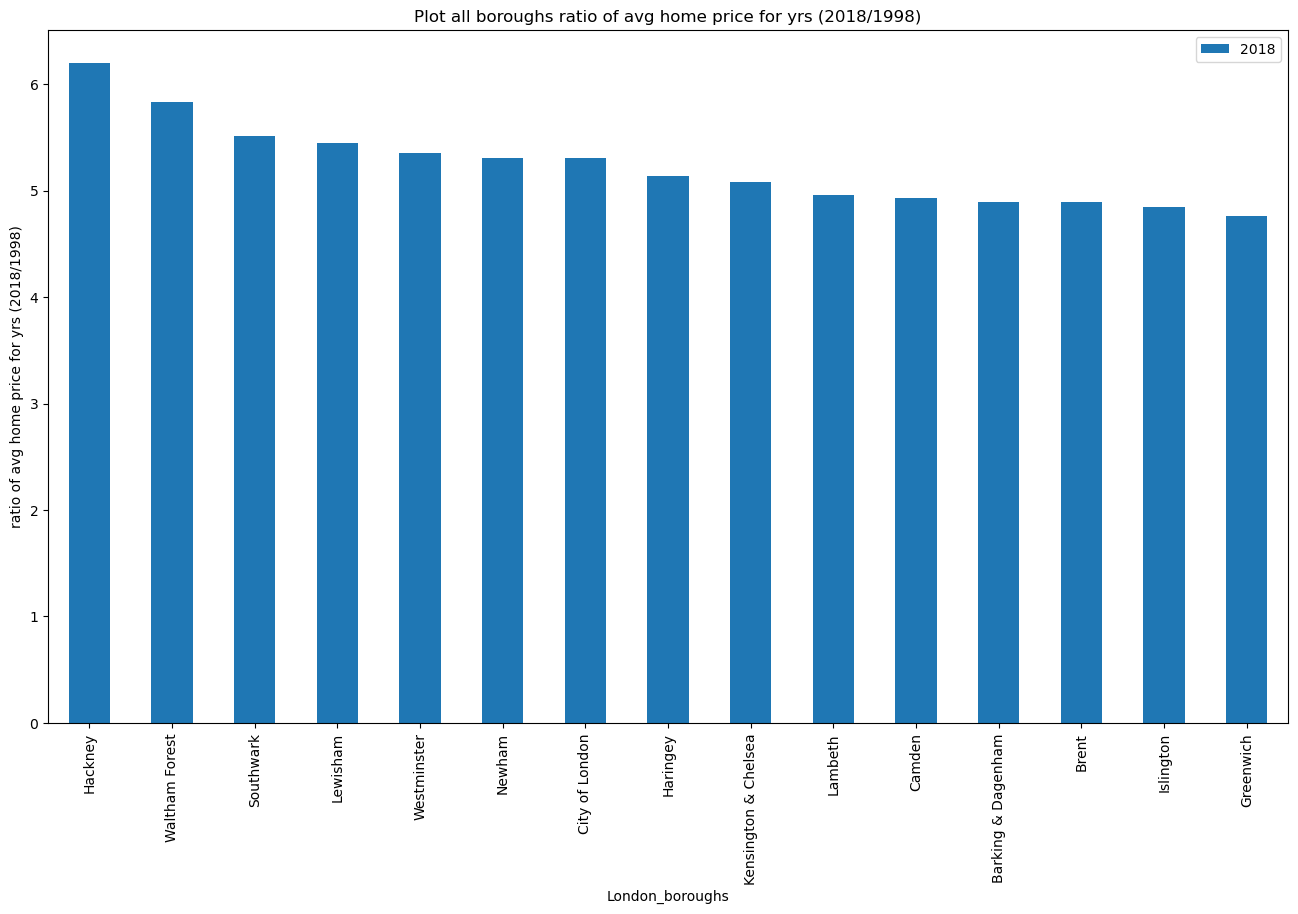

In [49]:
# Let's plot the boroughs that have seen the greatest changes in price.
# Make a variable called ax. Assign it the result of filtering top15 on 'Borough' and '2018', then calling plot(), with
# the parameter kind = 'bar'. 
ax = top15[['Borough','2018']].plot(kind='bar', figsize=(16,9))

ax.set_xticklabels(top15.Borough)
plt.title('Plot all boroughs ratio of avg home price for yrs (2018/1998)');
plt.xlabel("London_boroughs");
plt.ylabel("ratio of avg home price for yrs (2018/1998)");

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

__Conclusion: Which Boroughs Saw the Biggest Two-Decade Price Jumps?__

The bar chart above plots each borough’s 2018/1998 average-price ratio (i.e., how many times higher prices were in 2018 compared to 1998). From highest to lowest:

Hackney tops the list at roughly 6.2×, meaning its average home price in 2018 was over six times what it was in 1998.

Waltham Forest follows at about 5.8×, and Southwark comes in around 5.5×.

Lewisham and Westminster both sit near 5.4×–5.3×, joined closely by Newham and the City of London, each around 5.3×.

Boroughs like Haringey, Kensington & Chelsea, and Lambeth hover just above 5×, while Camden and Barking & Dagenham come in just under 5×.

At the lower end of this top-15 chart are Brent, Islington, and Greenwich, each with ratios between 4.7× and 4.9×.

In other words, Hackney’s transformation—from an average price of roughly £88 000 in 1998 to about £545 000 in 2018—represents the steepest two-decade climb of all London boroughs. Waltham Forest and Southwark follow closely, each more than quintupling their 1998 values. By contrast, boroughs at the rightmost end of this chart (e.g., Greenwich) saw smaller, though still significant, multipliers, indicating a relatively slower—but still substantial—rise during the same period.








__Justification__ <br>
Data rules for modelling appied: We calculated each borough’s mean price in 1998 and mean price in 2018 (averaging all four quarters per year). The quotient (2018 ÷ 1998) ranks boroughs by relative increase.